In [2]:
import sys
sys.path.insert(0,'../')

In [4]:
import LSEModel1

In [5]:
lse=LSEModel1.LSEModel()

In [7]:
gradient, num_gradient = lse.test_gradient()

p [[0.5 0.5]
 [0.5 0.5]]
y [[False  True]
 [ True  True]]
gradient by function:  [ 0.          0.         -0.70710678 -0.70710678  0.          0.70710678
  0.          0.70710678 -0.         -1.         -0.         -1.        ]
gradient by num:  [ 0.          0.         -0.70610184 -0.70610184  0.00444089  0.71054274
  0.          0.71054274  0.         -0.99920072  0.         -0.99920072]
error:  [0.         0.         0.00100494 0.00100494 0.00444089 0.00343595
 0.         0.00343595 0.         0.00079928 0.         0.00079928]


In [8]:
import numpy as np
from collections import OrderedDict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gradient']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
a=np.arange(10).reshape(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [10]:
a.sum(axis=1)

array([10, 35])

p [[0.65882613 0.81496744 0.63965236 0.53698005 0.80068264 0.48182406
  0.56800143 0.6931156  0.53633285 0.61020526]
 [0.73051563 0.85894276 0.66476089 0.60518544 0.82821851 0.54808542
  0.62455625 0.73759745 0.60851472 0.68224363]
 [0.76987141 0.88100783 0.59181571 0.62988816 0.80934806 0.56649384
  0.62525707 0.73039378 0.64145878 0.7202266 ]
 [0.72183628 0.8468764  0.50541484 0.55034899 0.74888724 0.48294699
  0.54147489 0.65645773 0.56512732 0.65560878]
 [0.79326562 0.88832904 0.62287607 0.63705334 0.81891703 0.57366365
  0.63328448 0.73840964 0.65005789 0.73167417]
 [0.63617392 0.79487612 0.52414925 0.48589334 0.7365898  0.42571389
  0.49926188 0.62510405 0.49217217 0.57594389]
 [0.76123118 0.8778412  0.66310226 0.63837037 0.8368006  0.58043266
  0.64943614 0.75534237 0.64408342 0.71645592]
 [0.70088955 0.84452816 0.60090144 0.57733158 0.79918576 0.51771086
  0.59045272 0.70612827 0.58208155 0.65790979]
 [0.6545724  0.81342997 0.58167911 0.52700618 0.77599505 0.46868432
  0.547051

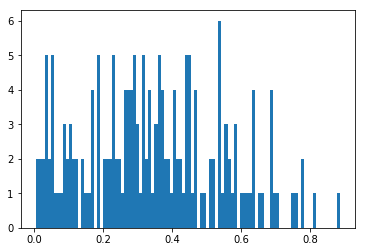

In [15]:
num_students=50
num_questions = 10
embedding_dimension = 2
s=np.random.random((num_students,embedding_dimension))
a=np.random.random((embedding_dimension,num_questions))
gms=np.random.random((num_students,1))
gmq=np.random.random((1,num_questions))
# s[:]=1
# a[:]=1
# gms[:]=0
# gmq[:]=0
p=lse.prob(s,a,gms,gmq)

y=np.random.random(p.shape)<p

x,_dict = lse.stretch2(OrderedDict([('s',s),('a',a),('gms',gms),('gmq',gmq)]))
# print _dict
cost,gradient=lse.auxiliary(x,y,0,_dict)
num_gradient = np.zeros(x.shape)
delta_x=1e-13
for i in range(x.size):
    x[i]+=delta_x
    num_gradient[i]=(lse.auxiliary(x,y,0,_dict)[0]-cost)/delta_x
    x[i]-=delta_x
# print ('gradient by function: ',gradient)
# print ('gradient by num: ',num_gradient)
abs_erros=np.abs(gradient - num_gradient)
print ('error: ', abs_erros)
pylab.hist(abs_erros, bins=100)
pylab.show()

In [13]:
gradient - num_gradient

array([ 4.29761596e-01,  4.29761596e-01,  4.29761596e-01,  4.29761596e-01,
        2.91089003e-01,  2.91089003e-01,  1.38672593e-01,  1.38672593e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.29761596e-01,  4.29761596e-01,  1.38672593e-01,  1.38672593e-01,
        4.29761596e-01,  4.29761596e-01,  0.00000000e+00,  0.00000000e+00,
        1.38672593e-01,  1.38672593e-01,  1.38672593e-01,  1.38672593e-01,
        1.38672593e-01,  1.38672593e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.77345185e-01, -2.77345185e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.77345185e-01, -2.77345185e-01, -1.52416411e-01, -1.52416411e-01,
        1.38672593e-01,  1.38672593e-01,  1.38672593e-01,  1.38672593e-01,
       -1.38672593e-01, -1.38672593e-01,  4.29761596e-01,  4.29761596e-01,
        4.29761596e-01,  